In [ ]:
%pip install flaml[notebook]==1.0.10

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from flaml.data import load_openml_dataset
X_train, X_test, y_train, y_test = load_openml_dataset(dataset_id=40536, data_dir='./')
print("Data type:", type(X_train), type(y_train))
print("The first 5 rows of X_train:")
print(X_train.head())
print("The first 5 rows of y_train:")
print(y_train.head())

INFO:openml.datasets.dataset:Going to remove the following attributes: ['decision', 'decision_o']


load dataset from ./openml_ds40536.pkl
Dataset name: SpeedDating
X_train.shape: (6283, 120), y_train.shape: (6283,);
X_test.shape: (2095, 120), y_test.shape: (2095,)
Data type: <class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>
The first 5 rows of X_train:
     has_null  wave  gender   age  age_o  d_age d_d_age  \
5546        1  14.0    male  25.0   32.0    7.0  [7-37]   
235         0   2.0  female  21.0   24.0    3.0   [2-3]   
7066        1  19.0  female  26.0   29.0    3.0   [2-3]   
7357        1  20.0  female  25.0   27.0    2.0   [2-3]   
1108        0   4.0  female  28.0   27.0    1.0   [0-1]   

                                       race  \
5546            European/Caucasian-American   
235   Asian/Pacific Islander/Asian-American   
7066            European/Caucasian-American   
7357                 Black/African American   
1108            European/Caucasian-American   

                                     race_o samerace  ...  \
5546            Europ

In [ ]:
from flaml import AutoML
automl = AutoML()

In [ ]:
settings = {
    "time_budget": 300,  # total running time in seconds
    "metric": 'accuracy',  # can be: 'r2', 'rmse', 'mae', 'mse', 'accuracy', 'roc_auc', 'roc_auc_ovr',
                           # 'roc_auc_ovo', 'log_loss', 'mape', 'f1', 'ap', 'ndcg', 'micro_f1', 'macro_f1'
    "task": 'classification',  # task type
    "log_file_name": 'speed_dating.log',  # flaml log file
    "seed": 340192,    # random seed
}

In [ ]:
automl.fit(X_train=X_train, y_train=y_train, **settings)

[flaml.automl: 12-04 23:38:11] {2540} INFO - task = classification
INFO:flaml.automl:task = classification
[flaml.automl: 12-04 23:38:11] {2542} INFO - Data split method: stratified
INFO:flaml.automl:Data split method: stratified
[flaml.automl: 12-04 23:38:11] {2545} INFO - Evaluation method: holdout
INFO:flaml.automl:Evaluation method: holdout
[flaml.automl: 12-04 23:38:11] {2664} INFO - Minimizing error metric: 1-accuracy
INFO:flaml.automl:Minimizing error metric: 1-accuracy
[flaml.automl: 12-04 23:38:11] {2806} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'catboost', 'xgboost', 'extra_tree', 'xgb_limitdepth', 'lrl1']
INFO:flaml.automl:List of ML learners in AutoML Run: ['lgbm', 'rf', 'catboost', 'xgboost', 'extra_tree', 'xgb_limitdepth', 'lrl1']
[flaml.automl: 12-04 23:38:11] {3108} INFO - iteration 0, current learner lgbm
INFO:flaml.automl:iteration 0, current learner lgbm
[flaml.automl: 12-04 23:38:11] {3242} INFO - Estimated sufficient time budget=3322s. Estimated nec

In [ ]:
print('Best ML leaner:', automl.best_estimator)
print('Best hyperparmeter config:', automl.best_config)
print('Best accuracy on validation data: {0:.4g}'.format(1-automl.best_loss))
print('Training duration of best run: {0:.4g} s'.format(automl.best_config_train_time))

Best ML leaner: lgbm
Best hyperparmeter config: {'n_estimators': 125, 'num_leaves': 28, 'min_child_samples': 57, 'learning_rate': 0.550953429025205, 'log_max_bin': 8, 'colsample_bytree': 0.9278395204207502, 'reg_alpha': 0.0009765625, 'reg_lambda': 1024.0}
Best accuracy on validation data: 0.878
Training duration of best run: 0.678 s


In [ ]:
!pip install --upgrade pip==21.3
!pip install -U seaborn scikit-learn model-card-toolkit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
'''
import pickle
with open('automl.pkl', 'wb') as f:
    pickle.dump(automl, f, pickle.HIGHEST_PROTOCOL)
'''

"\nimport pickle\nwith open('automl.pkl', 'wb') as f:\n    pickle.dump(automl, f, pickle.HIGHEST_PROTOCOL)\n"

In [ ]:
from datetime import date
from io import BytesIO
from IPython import display
import model_card_toolkit as mctlib
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_roc_curve, plot_confusion_matrix

import base64
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import uuid

In [ ]:
X_train.head()

,has_null,wave,gender,age,age_o,d_age,d_d_age,race,race_o,samerace,...,expected_num_interested_in_me,expected_num_matches,d_expected_happy_with_sd_people,d_expected_num_interested_in_me,d_expected_num_matches,like,guess_prob_liked,d_like,d_guess_prob_liked,met
5546,1,14.0,male,25.0,32.0,7.0,[7-37],European/Caucasian-American,European/Caucasian-American,1,...,NaN,5.0,[7-10],[0-3],[3-5],5.0,7.0,[0-5],[7-10],0.0
235,0,2.0,female,21.0,24.0,3.0,[2-3],Asian/Pacific Islander/Asian-American,European/Caucasian-American,0,...,3.0,3.0,[5-6],[0-3],[3-5],7.0,6.0,[6-8],[5-6],0.0
7066,1,19.0,female,26.0,29.0,3.0,[2-3],European/Caucasian-American,Latino/Hispanic American,0,...,NaN,NaN,[0-4],[0-3],[0-2],9.0,NaN,[9-10],[0-4],0.0
7357,1,20.0,female,25.0,27.0,2.0,[2-3],Black/African American,Asian/Pacific Islander/Asian-American,0,...,NaN,1.0,[5-6],[0-3],[0-2],5.0,4.0,[0-5],[0-4],0.0
1108,0,4.0,female,28.0,27.0,1.0,[0-1],European/Caucasian-American,European/Caucasian-American,1,...,6.0,2.0,[5-6],[4-9],[0-2],8.0,8.0,[6-8],[7-10],0.0


In [ ]:
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier()

In [ ]:
'''
from flaml.default import LGBMClassifier
lgbm = LGBMClassifier()
'''

'\nfrom flaml.default import LGBMClassifier\nlgbm = LGBMClassifier()\n'

In [ ]:
clf = lgbm.fit(X_train, y_train)

In [ ]:
# Utility function that will export a plot to a base-64 encoded string that the model card will accept.

def plot_to_str():
    img = BytesIO()
    plt.savefig(img, format='png')
    return base64.encodebytes(img.getvalue()).decode('utf-8')

In [ ]:
from io import BytesIO
import base64
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import uuid
with open('HouseRegressionBar.png', "rb") as img:
    mystring = base64.b64encode(img.read())
print(mystring)

b'iVBORw0KGgoAAAANSUhEUgAAAZ4AAAD2CAYAAADmrOGMAAAAAXNSR0IArs4c6QAAAARnQU1BAACxjwv8YQUAAAAJcEhZcwAADsMAAA7DAcdvqGQAAB7gSURBVHhe7d0JcJT1+cBxNGq1dJiWw/4FQlQIcuSkhnhwU0odVEABsVUoh4gTASsixSkEhLaMkbFolca2isaWMqgQEBisEBS12iiINyAGQR0gnCFAgJDn3+dhN92FLNk3v2SJu9/PzDP83nc3h28l377HmAbXXHONAAAQCdocwgMAiBjCAwCIKMIDAIgowhOGJk2ayE9+8hOGYRjGwzRt2tT3UzQY4QmDHkAAgDehfnYSnjAQHgDwjvA4IDwA4B3hcUB4AMA7wuOA8ACAd4THAeEBAO8IjwPCAwDeER4HhAcAvCM8DggPAHhHeBxc9H9tJGHyK0yEBkB0IDwOCE9kB0B0IDwOCE9kB0B0IDwOCE9kB0B0IDwOCE9kB0B0IDwOCE9kB0B0IDwOCE9kB0B0qNPwNGzY0LeqGzfccIPs37/f5sknn/TtDV9BQYH069fPt+Ud4YnsAIgO3+nw+BUVFUnHjh19W+EjPN+tARAdIh6eDRs2SGZmpiQnJ8uAAQNk3759tr979+7y4IMPSkZGhiQmJsobb7xh+w8fPiyDBw+W9u3b2/s7d+4shYWF9lpCQoIUFxfLbbfdJhdffLGkpqbKAw88cEZQsrKy5Nlnn7X1ypUr5aqrrpL09HQZN25c5ftKS0tlxIgR9vXT0tJkyZIltv9sCE9kB0B0iHh4NDhr16619dSpU2XChAm21vDcf//9tl6+fLn07t3b1jk5OTJmzBhbf/TRRxIXF3dGeE4/4wkVnqNHj0rLli1l8+bNUlFRYUHzv2/KlCmSl5dna710p/HTGJ0uNzfXDppOXKNmVf6AZOpmAESHiIbnwIEDEh8f79sS+eKLL+zMQ2l43nzzTVvv3LlTWrdubev+/fvLmjVrbK

In [ ]:
with open('Housing graph.png', "rb") as img:
    randstring = base64.b64encode(img.read())
print(randstring)

b'iVBORw0KGgoAAAANSUhEUgAAAZAAAAEWCAYAAABIVsEJAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4yLjIsIGh0dHA6Ly9tYXRwbG90bGliLm9yZy+WH4yJAAAgAElEQVR4nO3de7hcVX3/8feHQ24WIQmJNISEhBKjIDbRI94vIBikSqKigq1FFKNWrcrPaFIUKZY2liq1T6kaKXIR5JIiRI1G5GYrl3AwITeNhHDLIZBwCSIEQpLv74+9JuwMM5PJnDNn9jnzeT3PPLP32mvP/p4Nme+stfZeWxGBmZnZ7tqj1QGYmVn/5ARiZmYNcQIxM7OGOIGYmVlDnEDMzKwhTiBmZtYQJxCzJpD0ZkmrWx2HWTM5gdiAI+leSUe1MoaI+N+ImNysz5c0TdKvJT0paaOkmyQd16zjmVXiBGLWAEkdLTz28cCVwEXAAcB+wOnAuxv4LEny94A1xP/jWNuQtIek2ZLulvSopCskjcxtv1LSQ5KeSL/uD81tu0DSdyQtlPQUcERq6XxR0rK0z+WShqb6b5O0Lrd/1bpp+5ckrZf0oKRTJIWkgyv8DQK+BXw9Is6LiCciYntE3BQRH091zpD0w9w+E9Ln7ZnWb5R0lqTfAE8DsyR1lR3nC5IWpOUhkv5N0v2SHpb0XUnDevifwwYAJxBrJ58FZgBvBfYHHgfOzW3/OTAJeAnwW+CSsv0/BJwFvBj4v1T2AeAYYCLwSuAjNY5fsa6kY4BTgaOAg4G31fiMycA4YH6NOvX4MDCT7G/5LjBZ0qTc9g8Bl6blucBLgSkpvrFkLR5rc04g1k4+CZwWEesi4lngDOD40i/ziDg/Ip7MbftLSfvk9r8mIn6TfvE/k8r+IyIejIjHgJ+QfclWU63uB4AfRMTKiHg6HbuafdP7+nr/6CouSMfbGhFPANcAJwKkRP

In [ ]:
with open('corrhouse.png', "rb") as img:
    Lightspeed = base64.b64encode(img.read())

In [ ]:
with open('housing image.png', "rb") as img:
    flamlspeed = base64.b64encode(img.read())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


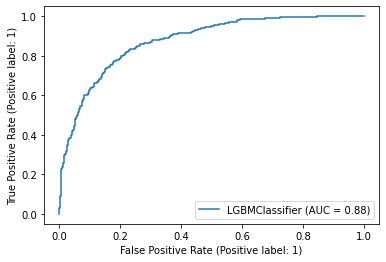

In [ ]:
plot_roc_curve(clf, X_test, y_test)
roc_curve = plot_to_str()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


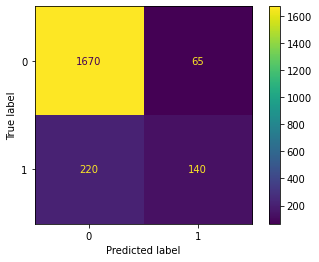

In [ ]:
# Plot a confusion matrix

plot_confusion_matrix(clf, X_test, y_test)
confusion_matrix = plot_to_str()

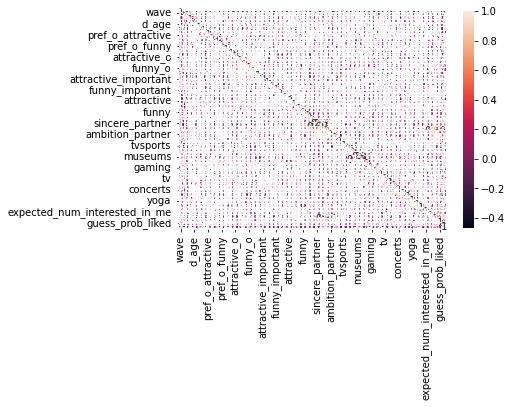

In [ ]:
correlation_matrix = X_train.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

In [ ]:
mct = mctlib.ModelCardToolkit()

model_card = mct.scaffold_assets()

In [ ]:

model_card.model_details.name = 'California Housing Dataset'
model_card.model_details.overview = (
    'The model was trained on a regression housing dataset that collected information on the variables using all the block groups in California from the 1990 Cens us.' 
    'In this sample a block group on average includes 1425.5 individuals living in a geographically co mpact area. Naturally,'
    'the geographical area included varies inversely with the population density. W e computed distances among the centroids of' 
    'each block group as measured in latitude and longitude. W e excluded all the block groups reporting zero entries for the independent and dependent variables.' 
    'The final data contained 20,640 observations on 9 variables. The dependent variable is ln(median house value).')
model_card.model_details.owners = [
    mctlib.Owner(name= 'Ethan Fang, Aidan Kelly, Justin Chong', contact='exf5204@psu.edu, aqk5773@psu.edu, jrc66@psu.edu')
]
model_card.model_details.references = [
    mctlib.Reference(reference='https://www.openml.org/search?type=data&status=active&id=44031&sort=runs'),
]
model_card.model_details.version.name = str(uuid.uuid4())
model_card.model_details.version.date = str(date.today())
'''
model_card.considerations.ethical_considerations = [mctlib.Risk(
    name=('Manual selection of image sections to digitize could create '
            'selection bias'),
    mitigation_strategy='Automate the selection process'
)]
'''
model_card.considerations.limitations = [mctlib.Limitation(description='The housing dataset was used to test regression. The model tests for the r^2 rather than accuracy while adding different estimators to compare them.')]
model_card.considerations.use_cases = [

mctlib.UseCase(description='The best machine learning leaner to be lgbm with an accuracy on validation data to be 85.77%.'),
mctlib.UseCase(description='The r^2 from the model is 0.863, mse = 0.01762403256174602, mae = 0.09118051517028303'),
mctlib.UseCase(description='Best hyperparmeter config: {n_estimators: 2293, num_leaves: 63, min_child_samples: 128, learning_rate: 0.08976924531622531, log_max_bin: 8, colsample_bytree: 0.7811493658141903, reg_alpha: 0.026077903517245378, reg_lambda: 1024.0}'),
mctlib.UseCase(description='The feature selection shows that location is one of the more favorable features of housing.')
]
model_card.considerations.users = [mctlib.User(description='Students'), mctlib.User(description='ML researchers')]


model_card.model_parameters.data.append(mctlib.Dataset())
model_card.model_parameters.data[0].graphics.description = (
  'random forest')
model_card.model_parameters.data[0].graphics.collection = [
    #mctlib.Graphic(image=roc_curve),
    #mctlib.Graphic(image=confusion_matrix),
    mctlib.Graphic(image=Lightspeed),
    mctlib.Graphic(image=randstring),
    mctlib.Graphic(image=mystring)
]
'''
model_card.model_parameters.data.append(mctlib.Dataset())
model_card.model_parameters.data[1].graphics.description = (
  f'{len(X_test)} rows with {len(X_test.columns)} features')
model_card.model_parameters.data[1].graphics.collection = [
    mctlib.Graphic(image=mean_radius_test),
    mctlib.Graphic(image=mean_texture_test)
]
'''
model_card.quantitative_analysis.graphics.description = (
  'Correlation Matrix')

model_card.quantitative_analysis.graphics.collection = [
    #mctlib.Graphic(image=roc_curve),
    #mctlib.Graphic(image=Lightspeed),
    mctlib.Graphic(image=flamlspeed),
    #mctlib.Graphic(image=mystring)
    
]


mct.update_model_card(model_card)


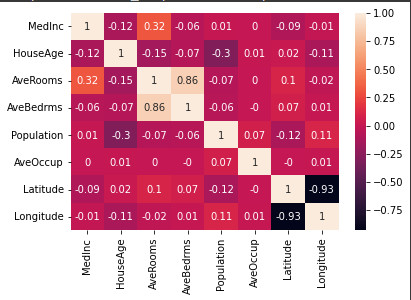
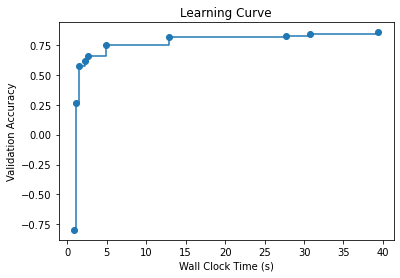
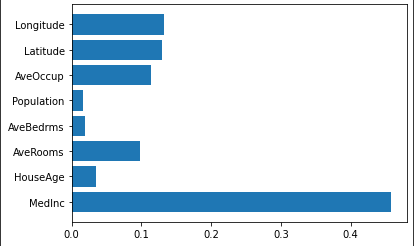
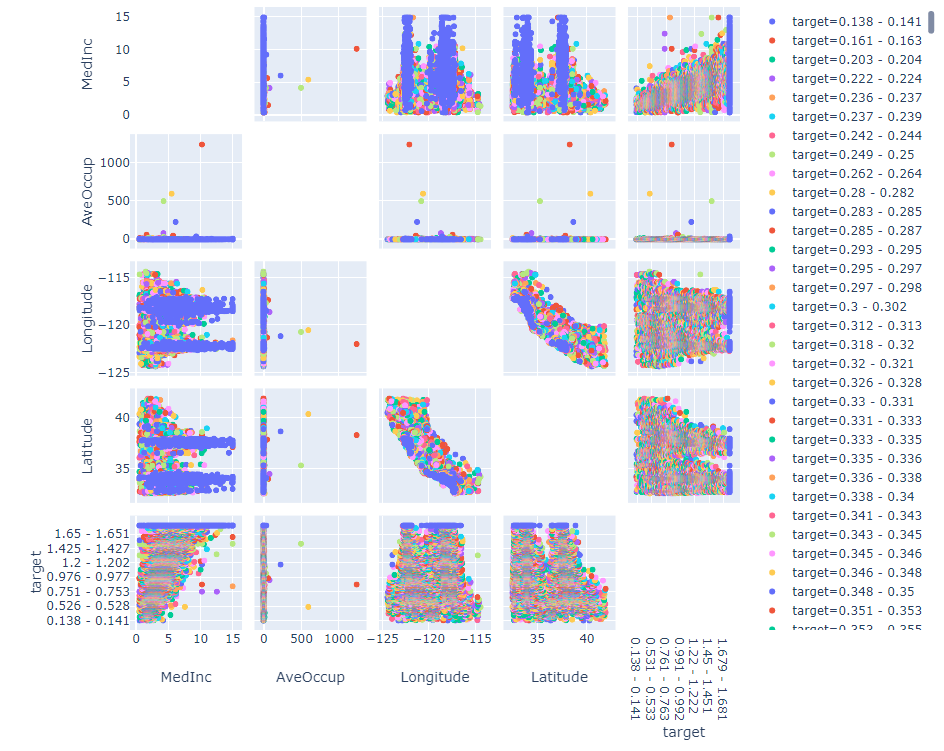

In [ ]:
# Return the model card document as an HTML page

html = mct.export_format()

display.display(display.HTML(html))